In this notebook, I'll implement the k-means clustering algorithm on synthetically generated data. Let's import the necessary libraries.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)

We generate three synthetic clusters, each containing 1000 observations. For each cluster, age and spending score are independently sampled from normal distributions with cluster-specific means and standard deviations.

In [2]:
obs_nmbr = 200

cluster1 = np.random.normal(loc=[25, 40], scale=[5, 10], size=(obs_nmbr, 2))
cluster2 = np.random.normal(loc=[40, 80], scale=[6, 5], size=(obs_nmbr, 2))
cluster3 = np.random.normal(loc=[60, 20], scale=[5, 5], size=(obs_nmbr, 2))

age, score = int(cluster1[:1][0][0]), int(cluster1[:1][0][1])

print(f'As an example, this hypothetical person is {age} years old and a spending score of {score}.')

As an example, this hypothetical person is 21 years old and a spending score of 56.


We combine the three clusters and create a dataframe with proper column names.

In [3]:
# combine
data = np.vstack([cluster1, cluster2, cluster3])

# DataFrame
df = pd.DataFrame(data, columns=["Age", "SpendingScore"])

# create a list for cluster labels
clusters = ['Cluster 1'] * obs_nmbr + ['Cluster 2'] * obs_nmbr + ['Cluster 3'] * obs_nmbr 

df.sample(2)

,Age,SpendingScore
582,64.825,19.400
379,36.979,66.893


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, clusters, test_size=0.2)

Let's visualize the whole dataset in 2D.   

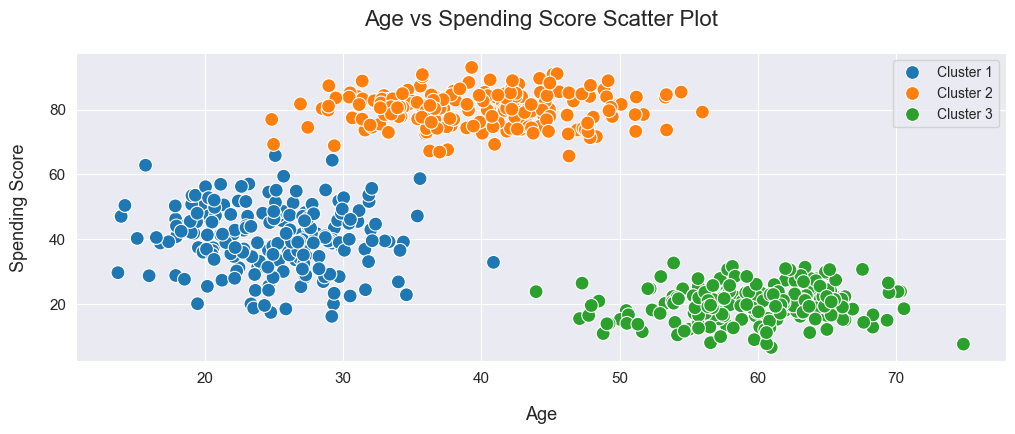

In [5]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")

sns.scatterplot(
    data=df,
    x="Age",
    y="SpendingScore",
    hue=clusters,
    palette="tab10",
    s=100,
    
)

plt.title("Age vs Spending Score Scatter Plot", fontsize=16, pad=20)
plt.xlabel("Age", fontsize=13, labelpad=15)
plt.ylabel("Spending Score", fontsize=13, labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

Let's visualize the train part of the dataset in 2d.

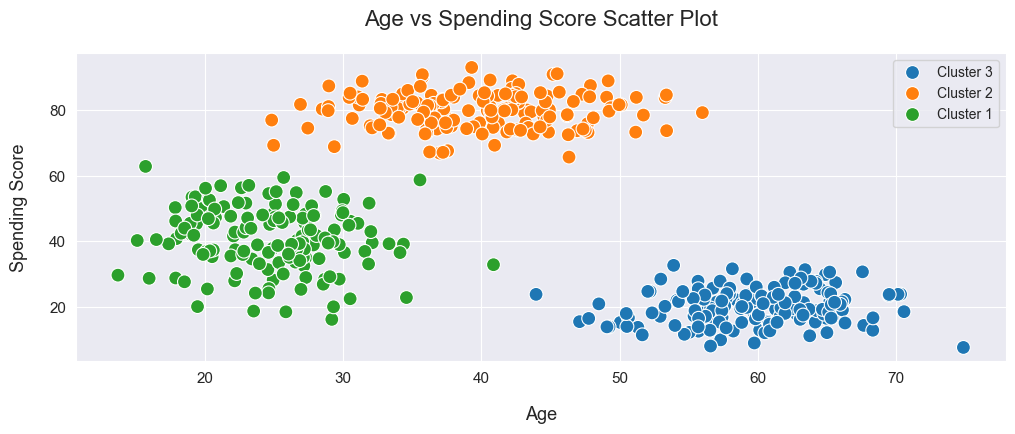

In [6]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")

sns.scatterplot(
    data=X_train,
    x="Age",
    y="SpendingScore",
    hue=y_train,
    palette="tab10",
    s=100,
    
)

plt.title("Age vs Spending Score Scatter Plot", fontsize=16, pad=20)
plt.xlabel("Age", fontsize=13, labelpad=15)
plt.ylabel("Spending Score", fontsize=13, labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

**Elbow Method For Ideal Cluster Number In K-Means**    
    
K-Means is a clustering algorithm. The way the algorithm works:
- We choose the cluster number (k) as an input for the algorithm. For instance k=3.
- Algorithm sets k=3 start points (centroids) arbitrarily.
- Algorithm appoints each data point to the nearest centroid. When all data points are appointed, we have k different clusters.
- Centroids are being recalculated.
- Last 2 steps will repeat untill there is no change for centroids.    
    
    
For other clustering algorithms click [here](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods).

---
What is the ideal number of clusters ? Elbow method is a common method that helps answering this question. In this method, we need to run K-Means algorithm for each pre-specified k value. Each time we calculate WCSS, in other word **Inertia**. We draw a line graph. The breaking point or the near points can be the ideal number of clusters.

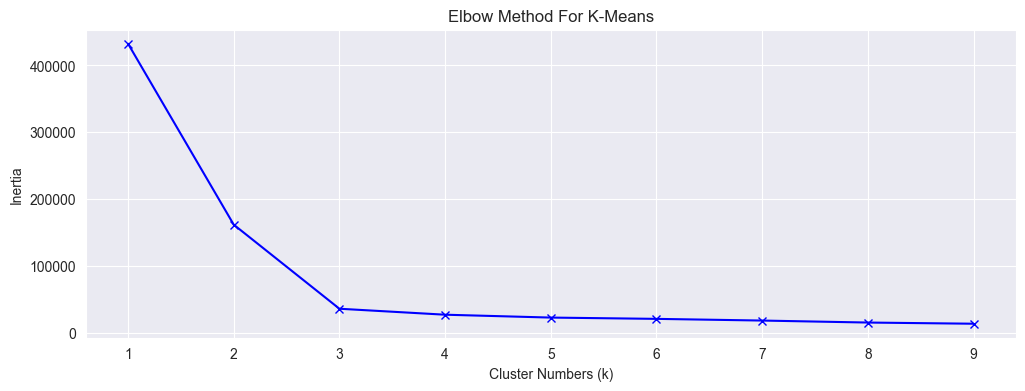

In [7]:
inertias = {}

# run k-means for each k value and calculate inertia
for cluster_number in range(1, 10):
    kmeanModel = KMeans(n_clusters=cluster_number, random_state=42).fit(X_train)
    inertias[cluster_number] = kmeanModel.inertia_
    
# draw a line graph of inertias across different k values
plt.figure(figsize=(12, 4))
plt.plot(range(1, 10), inertias.values(), 'bx-')
plt.xlabel('Cluster Numbers (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For K-Means')
plt.show()

Let's implement the K-Means algorithm for 3 clusters. We'll use only 2 parameters of the KMeans algorithm: `n_clusters` and `random_state`. 
- We can determine the number of clusters as well as the number of centroids to generate with `n_clusters`.
- We use an int for `random_state` to make randomness for centroid initialization deterministic.
    
There are lots of other parameters we can utilize such as `init`, `n_init`, and `max_iter`. But for simplicity we'll go with default values for those parameters.

In [8]:
# Instantiating the KMeans class with n_clusters and random_state parameters
kmeans = KMeans(n_clusters=3, random_state=42)

# Call the fit bound method of the KMeans instance to fit the model 
kmeans.fit(X_train)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


TO DO: make an explanation for labels_ attribute of the instance

In [9]:
# Create a new column for cluster labels by assigning instance attribute labels_
X_train['Cluster'] = kmeans.labels_

# Show two records by taking samples randomly
X_train.sample(2)

,Age,SpendingScore,Cluster
393,47.684,75.853,1
241,46.920,73.704,1


As a final step, let's visualize the dataset in 2D and color the each point according to their cluster.

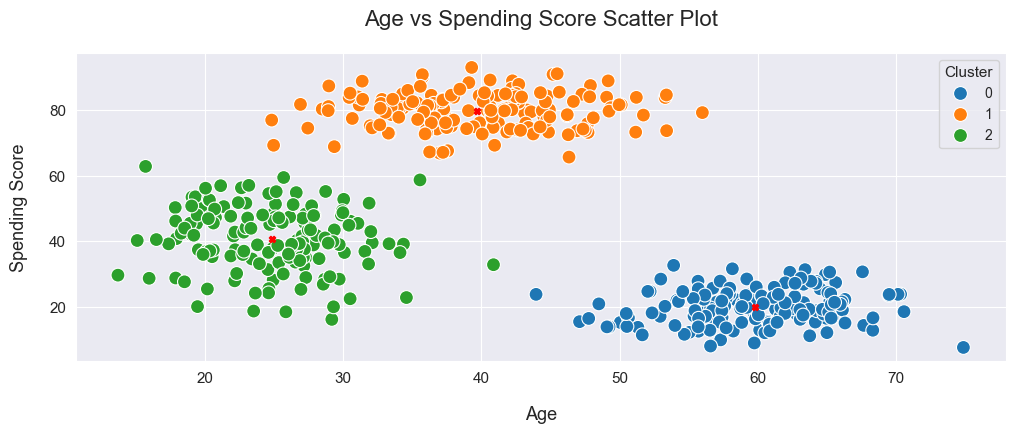

In [10]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")

sns.scatterplot(
    data=X_train,
    x="Age",
    y="SpendingScore",
    hue="Cluster",
    palette="tab10",
    s=100
)

plt.scatter(
    [x for x, y in kmeans.cluster_centers_],
    [y for x, y in kmeans.cluster_centers_],
    marker="X",
    color="red",
    s=20
)

plt.title("Age vs Spending Score Scatter Plot", fontsize=16, pad=20)
plt.xlabel("Age", fontsize=13, labelpad=15)
plt.ylabel("Spending Score", fontsize=13, labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Cluster", fontsize=10, title_fontsize=11)

plt.show()

TO DO: make an explanation for the predict bound method

In [11]:
pred = kmeans.predict(X_test)

TO DO: explain the visual    
visualization for prediction values

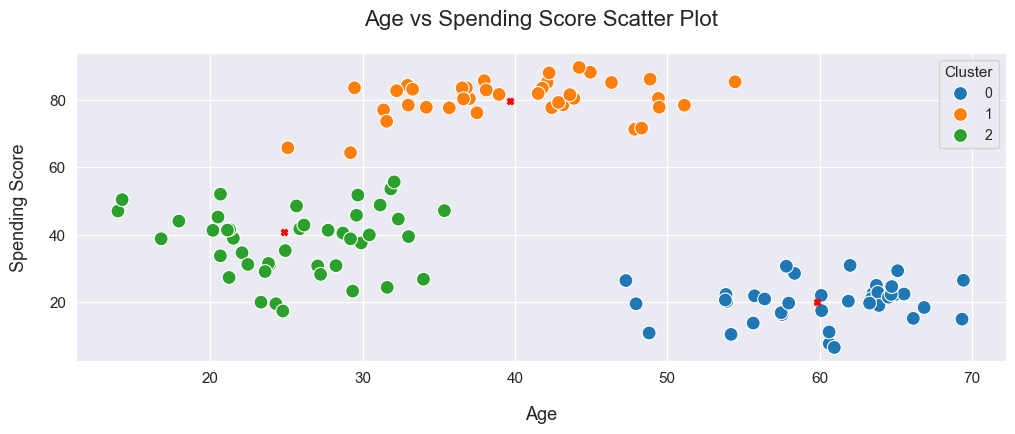

In [12]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")

sns.scatterplot(
    data=X_test,
    x="Age",
    y="SpendingScore",
    hue=pred,
    palette="tab10",
    s=100
)

plt.scatter(
    [x for x, y in kmeans.cluster_centers_],
    [y for x, y in kmeans.cluster_centers_],
    marker="X",
    color="red",
    s=20
)

plt.title("Age vs Spending Score Scatter Plot", fontsize=16, pad=20)
plt.xlabel("Age", fontsize=13, labelpad=15)
plt.ylabel("Spending Score", fontsize=13, labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Cluster", fontsize=10, title_fontsize=11)

plt.show()

visualization for real test values

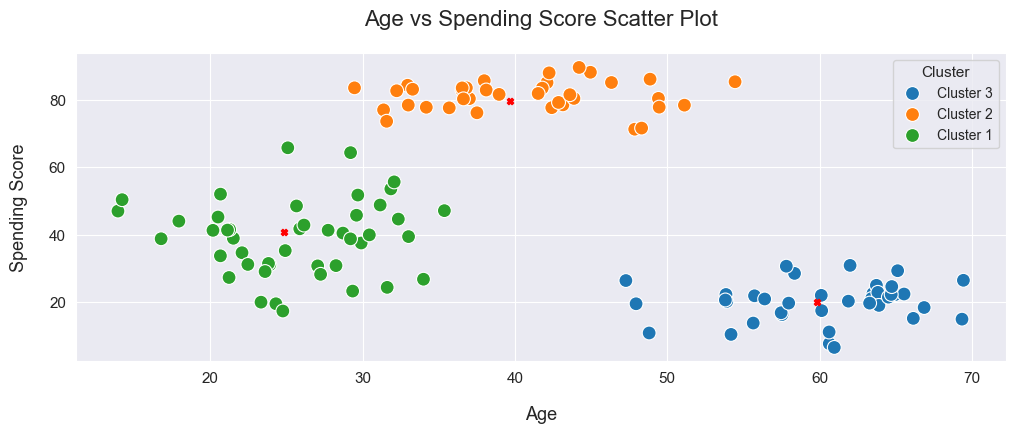

In [13]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")

sns.scatterplot(
    data=X_test,
    x="Age",
    y="SpendingScore",
    hue=y_test,
    palette="tab10",
    s=100
)

plt.scatter(
    [x for x, y in kmeans.cluster_centers_],
    [y for x, y in kmeans.cluster_centers_],
    marker="X",
    color="red",
    s=20
)

plt.title("Age vs Spending Score Scatter Plot", fontsize=16, pad=20)
plt.xlabel("Age", fontsize=13, labelpad=15)
plt.ylabel("Spending Score", fontsize=13, labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Cluster", fontsize=10, title_fontsize=11)

plt.show()